# La librería Scikit-learn
Se trata de la librería de machine learning por excelencia en Python. Dispone de una API muy elegante, con una lógica consistente que hace muy sencillo aplicar distintos tipos de algoritmos para la predicción,  la clasificación, la reducción de dimensión, el preprocesamiento de los datos así como la búsqueda de grupos (clustering).

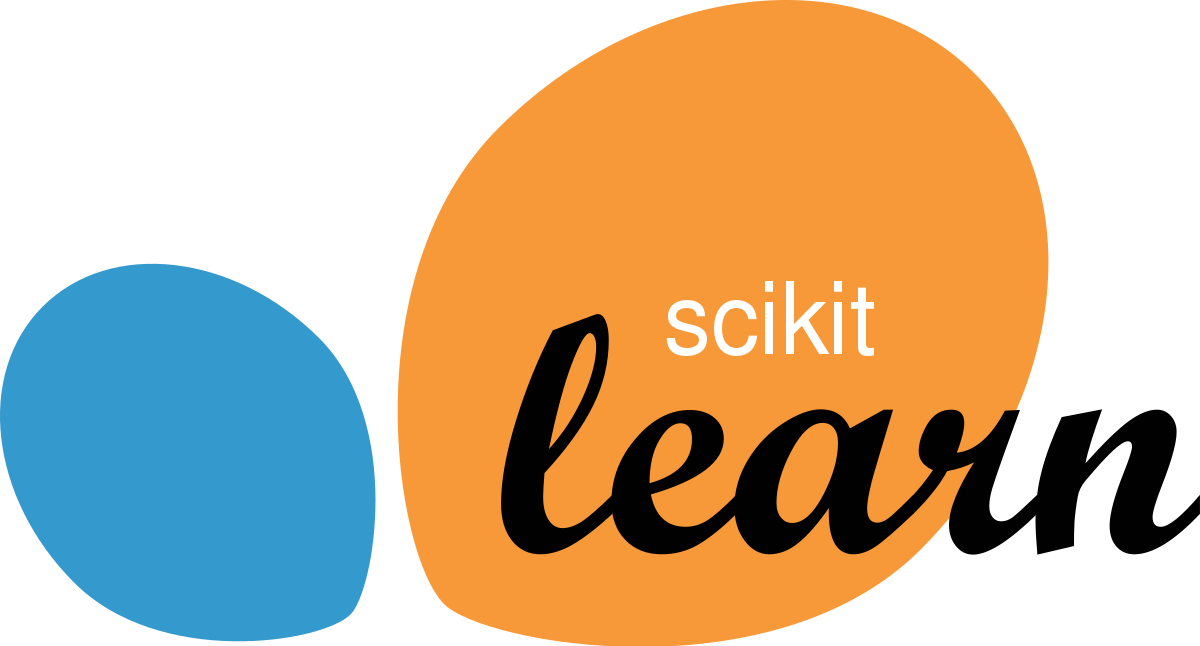

In [1]:
from IPython import display
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/12a9151e11f14bd39013fbc53d424301.png',
    width = 600, 
    height = 300
)

Un concepto básico en `scikit-learn` es el de "estimator" y de "transformer". 
> Un "transformer" es un procedimiento de procesado de los datos (para estanderizarlos por ejemplo, o imputar valores faltantes), mientras que un algoritmo que se ajuste a los datos es un "estimator". Una combinación de ellos pertenece a ambas clases a la vez.

Por ejemplo, consideremos el algoritmo de regresion lineal

In [2]:
from sklearn.linear_model import LinearRegression

o el procedimiento de estanderización:

In [3]:
from sklearn.preprocessing import StandardScaler

El primero es un `estimator` mientras que el segundo es un `transformer`. Les aplicamos varios pasos:

Varios pasos se siguen en orden para aplicar (un procedimiento o un algoritmo o una combinación de ambos)

1. Instanciamos el objeto, es decir declaramos una instancia de este estimador dándole un nombre
2. Actualizamos el objeto declarado, encontrando los valores de sus parámetros, usando los datos (`X` e posiblemente 'y'). Se hace con el método `fit`. Se hace `inplace`.
3. Si es un procedimiento de procesado, podemos aplicar el objeto actualizado en el paso 2 a los datos para procesarlos. Se hace con el método `transform` y devuelve los datos procesados.
4. Si es un algoritmo, podemos aplicar el estimador actualizado en el paso 2 a nuevos datos con el objetivo de predecir la variable respuesta o clasificar los nuevos individuos. Se hace con el método `predict`.

> Para hacernos una idea de la variedad de estimadores y transformadores implementados: [Página oficial de Scikit-learn](https://scikit-learn.org/stable/index.html)

Veamos un ejemplo con los datos de notas DURM y ETSIT que combina, para cada expediente de grado de la ETSIT, características del examen de acceso "PAU" con características de la trayectoria académica en el centro. 

Empezamos por importar los datos en un `DataFrame` que llamaremos `grados`

In [4]:
import numpy as np
import pandas as pd
grados = pd.read_csv(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/51b97ec8969047fa934d4f9bdeeb1297.csv'
)

Nos interesa, para empezar, predecir `MEDIA`, la nota media de los alumnos en su grado a partir de la calificación media obtenida en las pruebas de acceso a la universidad `NOTA_PAU_CALIFICACION`.

Definimos la matriz `X` de diseño y el vector `y` de respuestas.

In [5]:
grados_limpio = grados.dropna(subset=['MEDIA', 'NOTA_PAU_CALIFICACION'])
y = grados_limpio['MEDIA'].values
X = grados_limpio['NOTA_PAU_CALIFICACION'].values.reshape(-1,1)

Vamos a usar el estimator `LinearRegression` del submodulo `linear_model`

In [6]:
from sklearn.linear_model import LinearRegression

Instanciamos el estimador

In [7]:
lin_reg = LinearRegression()

Actualizamos el estimador, ajustando los valores de sus parámetros usando los datos.

In [8]:
lin_reg.fit(X, y) # Se hace 'inplace'

LinearRegression()

Si tenemos nuevos individuos con sus características, (X) podemos predecir la respuesta. Por ejemplo para un alumno que haya obtenido un 8 en las pruebas de acceso:

In [9]:
lin_reg.predict(np.array([8]).reshape(-1, 1))

array([7.36303681])

Veamos ahora cómo podemos estanderizar características usando el estimador `StandardScaler` del submódulo `preprocessing`

In [10]:
from sklearn.preprocessing import StandardScaler

Instanciamos el transformador

In [11]:
scaler = StandardScaler()

Actualizamos el transformador, ajustando los valores de sus parámetros usando los datos.

In [12]:
scaler.fit(X) 

StandardScaler()

Podemos ahora normalizar las características y guardarlas en una matriz usando `transform`.

In [13]:
columnas_normalizadas = scaler.transform(X)

También podemos aplicar el transformador sobre las características de un nuevo individuo 

In [14]:
scaler.transform(np.array([[8]]))

array([[0.49856921]])

Los estimadores o transformadores tienen atributos que contienen información relevante sobre su trabajo.


Por ejemplo, en el caso de `lin_reg`, podemos consultar los coeficientes del ajuste:

In [15]:
lin_reg.coef_

array([0.35175585])

In [16]:
lin_reg.intercept_

4.548989995036958

Es decir, que la ecuación del modelo ajustado es:
$$MEDIA = 4.55 + 0.35\cdot NOTA\_PAU\_CALIFICACION.$$

## A menudo, combinamos varios transformadores y/o estimadores y tenemos que hacerlo en el orden correcto
Para ello, usamos las "pipelines" de `scikit-learn`.

In [17]:
from sklearn.pipeline import Pipeline

Formamos un flujo de trabajo, especificando los pasos con tuplas (nombre, objeto).
Supongamos por ejemplo, que queremos imputar valores faltantes y luego normalizar las características.

In [18]:
scaler = StandardScaler()
lin_reg = LinearRegression()
regresor =  Pipeline([('estanderizacion', scaler), ('regresion', lin_reg)])

Ahora podemos aplicar el nuevo objeto combinado a los datos

In [19]:
regresor.fit(X, y)

Pipeline(steps=[('estanderizacion', StandardScaler()),
                ('regresion', LinearRegression())])

Y predecir la respuesta para  nuevos individuos

In [20]:
regresor.predict(np.array([8, 7]).reshape(-1, 1))

array([7.36303681, 7.01128095])

## Evaluar la bondad del ajuste
Una vez que tenemos ajustado un modelo, queremos comprobar la calidad del ajuste. Para ello, usamos indicadores que midan lo cerca que están los datos predichos de los datos observados.

En el submódulo `metrics` de `scikit-learn`, están implementados muchos indicadores sobre la calidad del ajuste, apropiados según el tipo de problema que consideremos.

En nuestro caso de predicción de una respuesta, podemos usar la raíz del error cuadrático medio residual (Root Mean Square Error, RMSE), que se calcula a partir del valor final de la función de coste optimizada:

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(y_i^{pred} - y_i\right)^2} = \sqrt{\frac 1 n\sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2},$$
donde $y_i^{pred}$ o $\hat{y}_i$ representan el valor predicho por el modelo para el individuo $i$.

Otra opción sería el error absoluto medio residual (Mean Absolute Deviation, MAD):

$$MAD = \frac{1}{n} \sum_{i=1}^n \left|y_i^{pred} - y_i\right|  = \sum_{i=1}^n \left|\hat{y}_i - y_i\right|.$$

En nuestro caso de la predicción de la nota media:

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
# Calculamos los valores predichos de nuestro modelo sobre el conjunto de características:
y_pred = lin_reg.predict(X)
# Podemos calcular el RMSE:
mean_squared_error(y_pred, y, squared=False)

2.9047427597370756

Si preferimos usar el error absoluto medio:

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y)

2.8569714899297165

## Una mejor evaluación de la calidad del modelo
En las transparencias anteriores, hemos medido la calidad del modelo sobre los mismos datos (X, y) que hemos usado para ajustarlo.

Puede dar una impresión falsa de bondad en el ajuste. Consideremos estos datos:

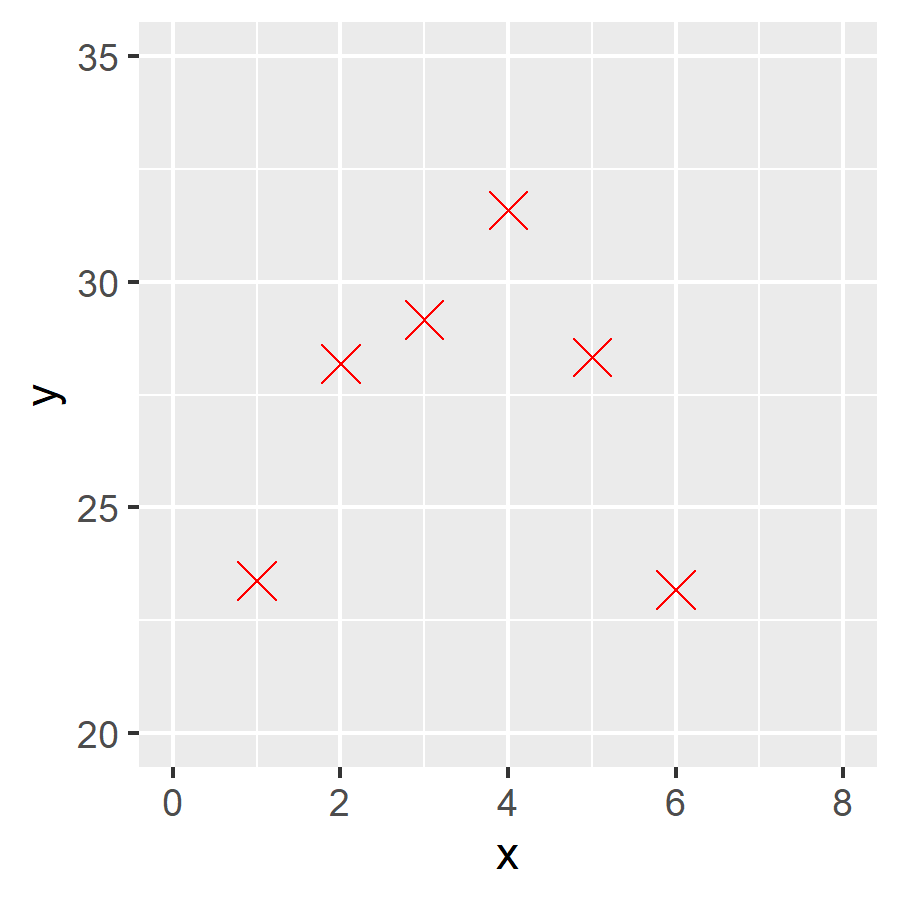

In [24]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/2cfa03c1916b4579a4d83cfdca82ada5.png',
    height = 400,
    width = 400)

Podemos usar un polinomio de orden 2 o un polinomio de orden 5 como hipótesis:

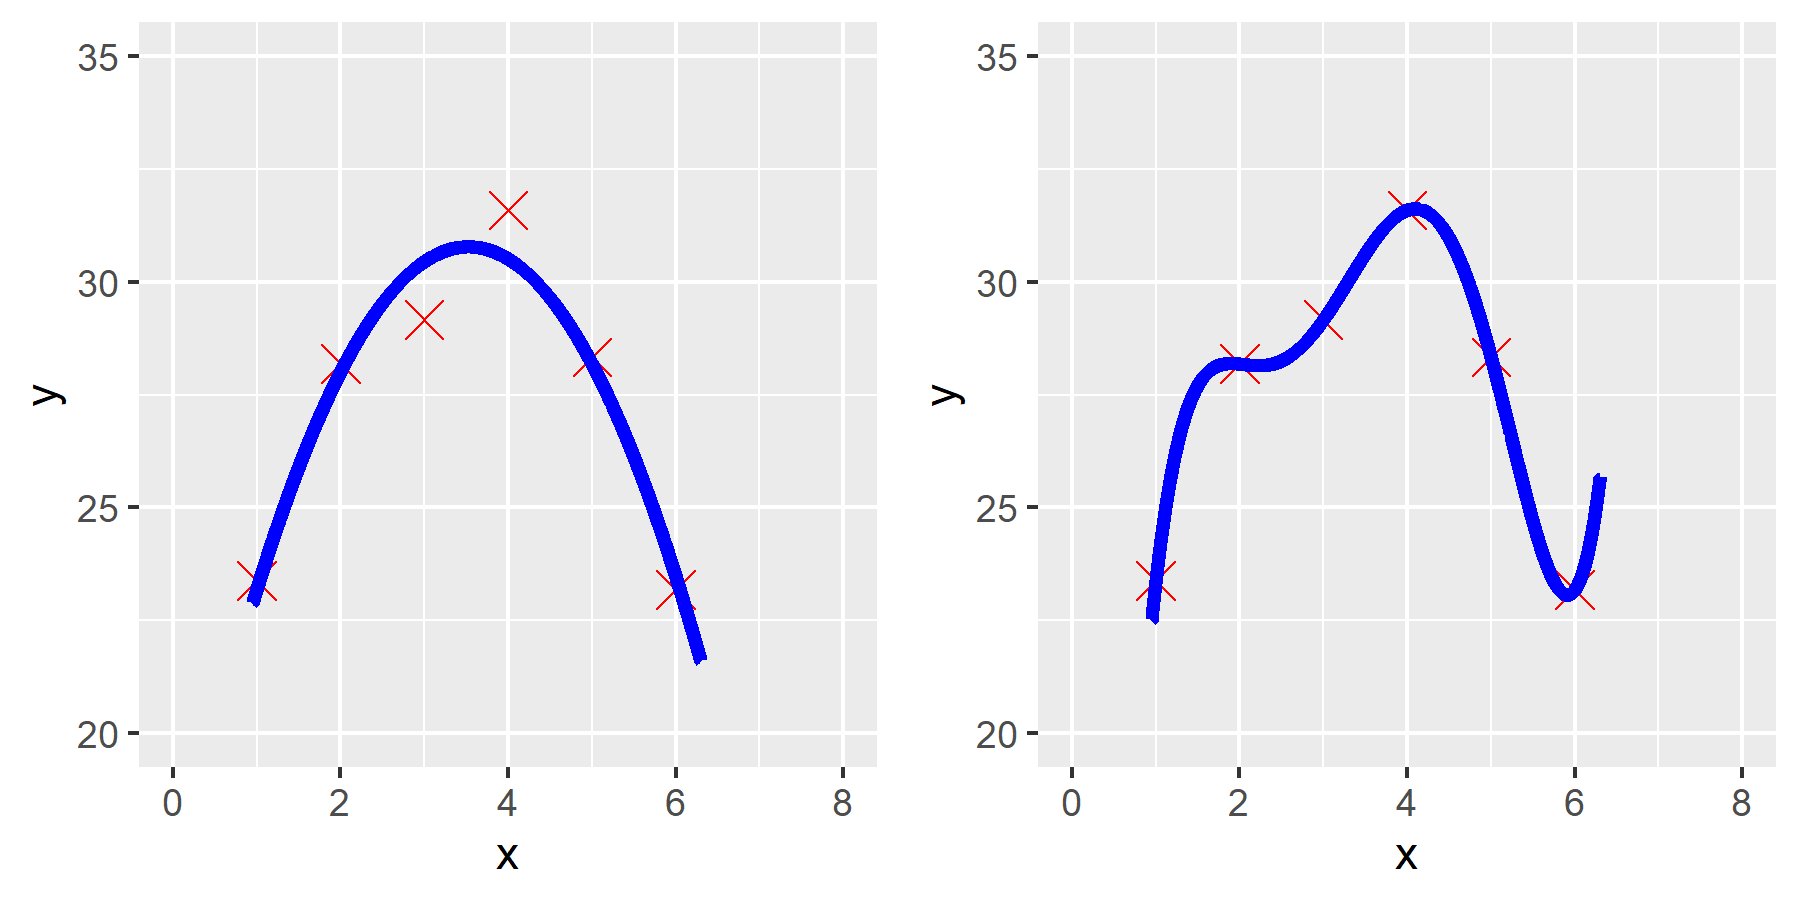

In [25]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/54b8449ab1a6428580aecd6124855bb9.png',
    width=800,
    height=400)

El modelo de grado 5 parece mejor, pero qué pasa si queremos usar los modelos para predecir un nuevo valor?

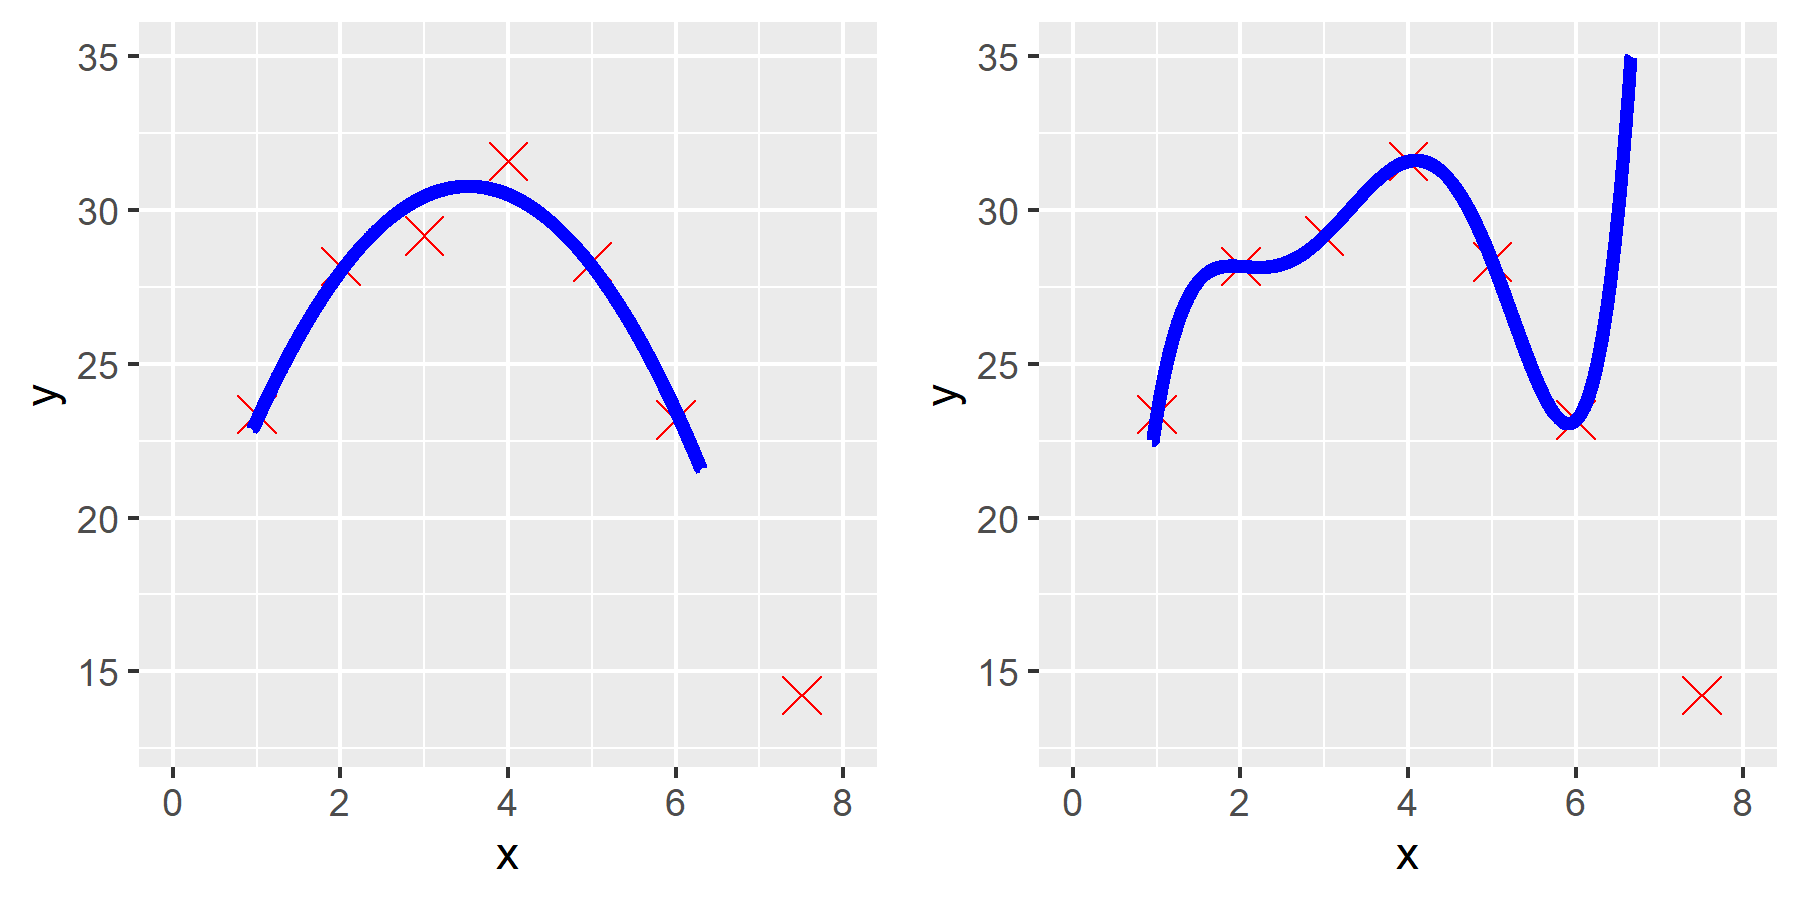

In [26]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/6fa8697e8bef4f5c9250d5da780c7009.png',
    width=800,
    height=400)

La predicción es mucho peor para el nuevo individuo en el modelo más complejo

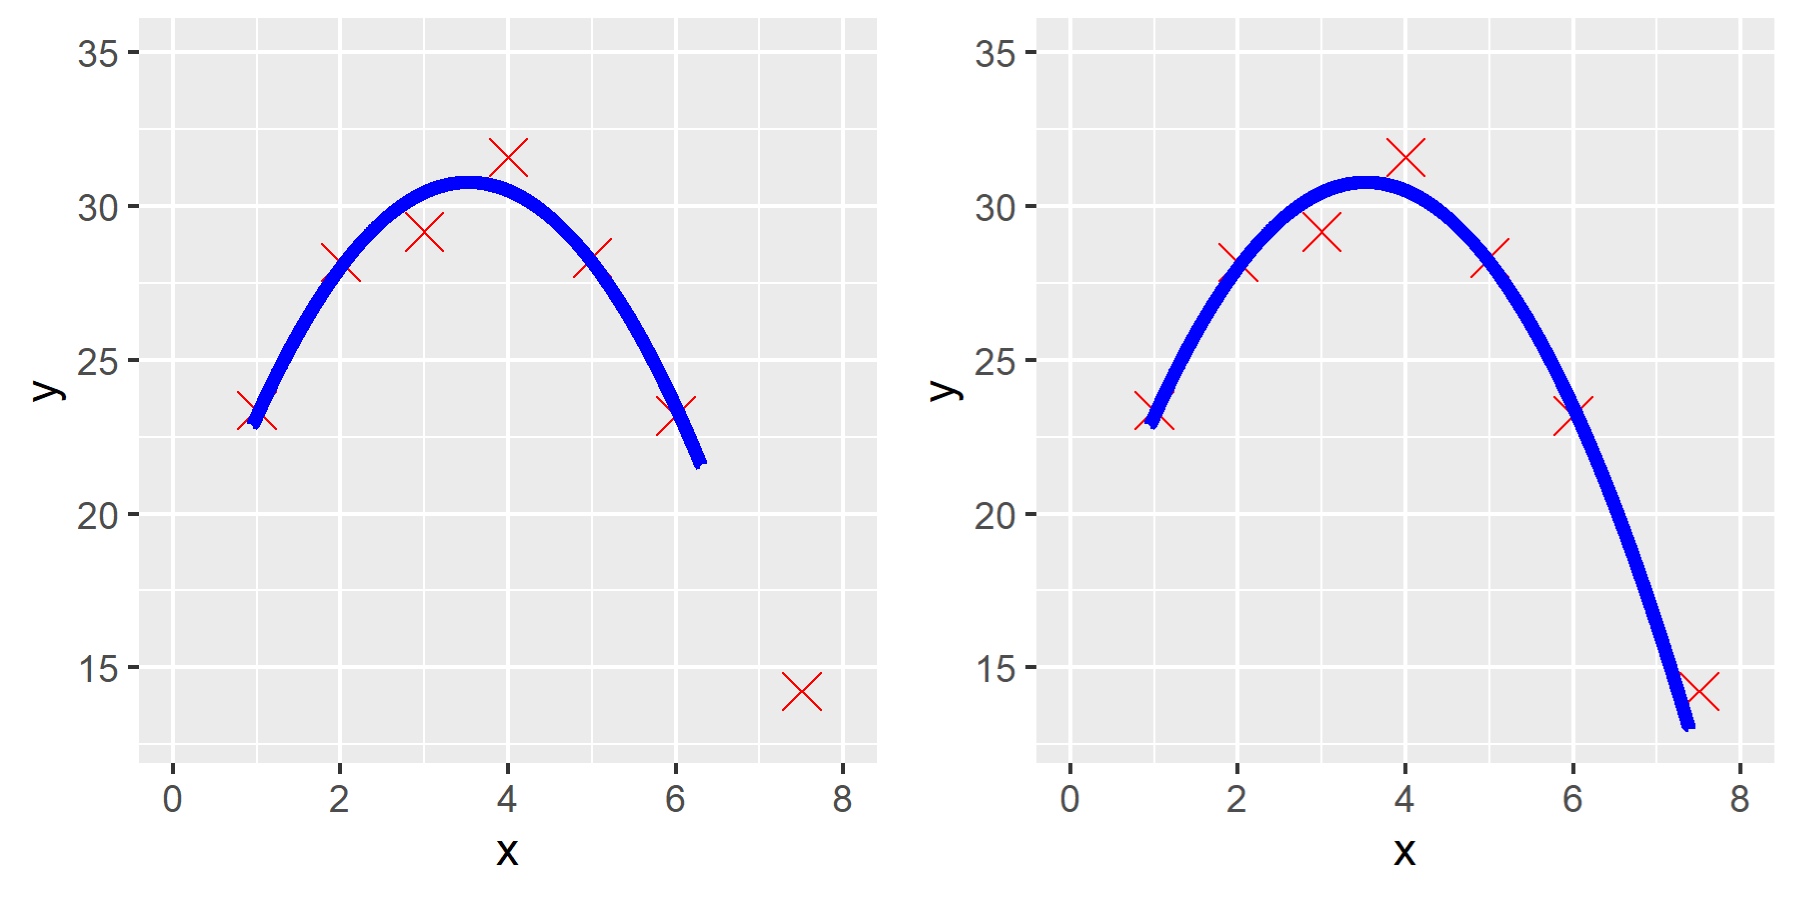

In [27]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/2db0e0d944314f8fb7e70fc4d3587871.png',
    width=800,
    height=400)

La predicción es mucho peor para el nuevo individuo en el modelo más complejo

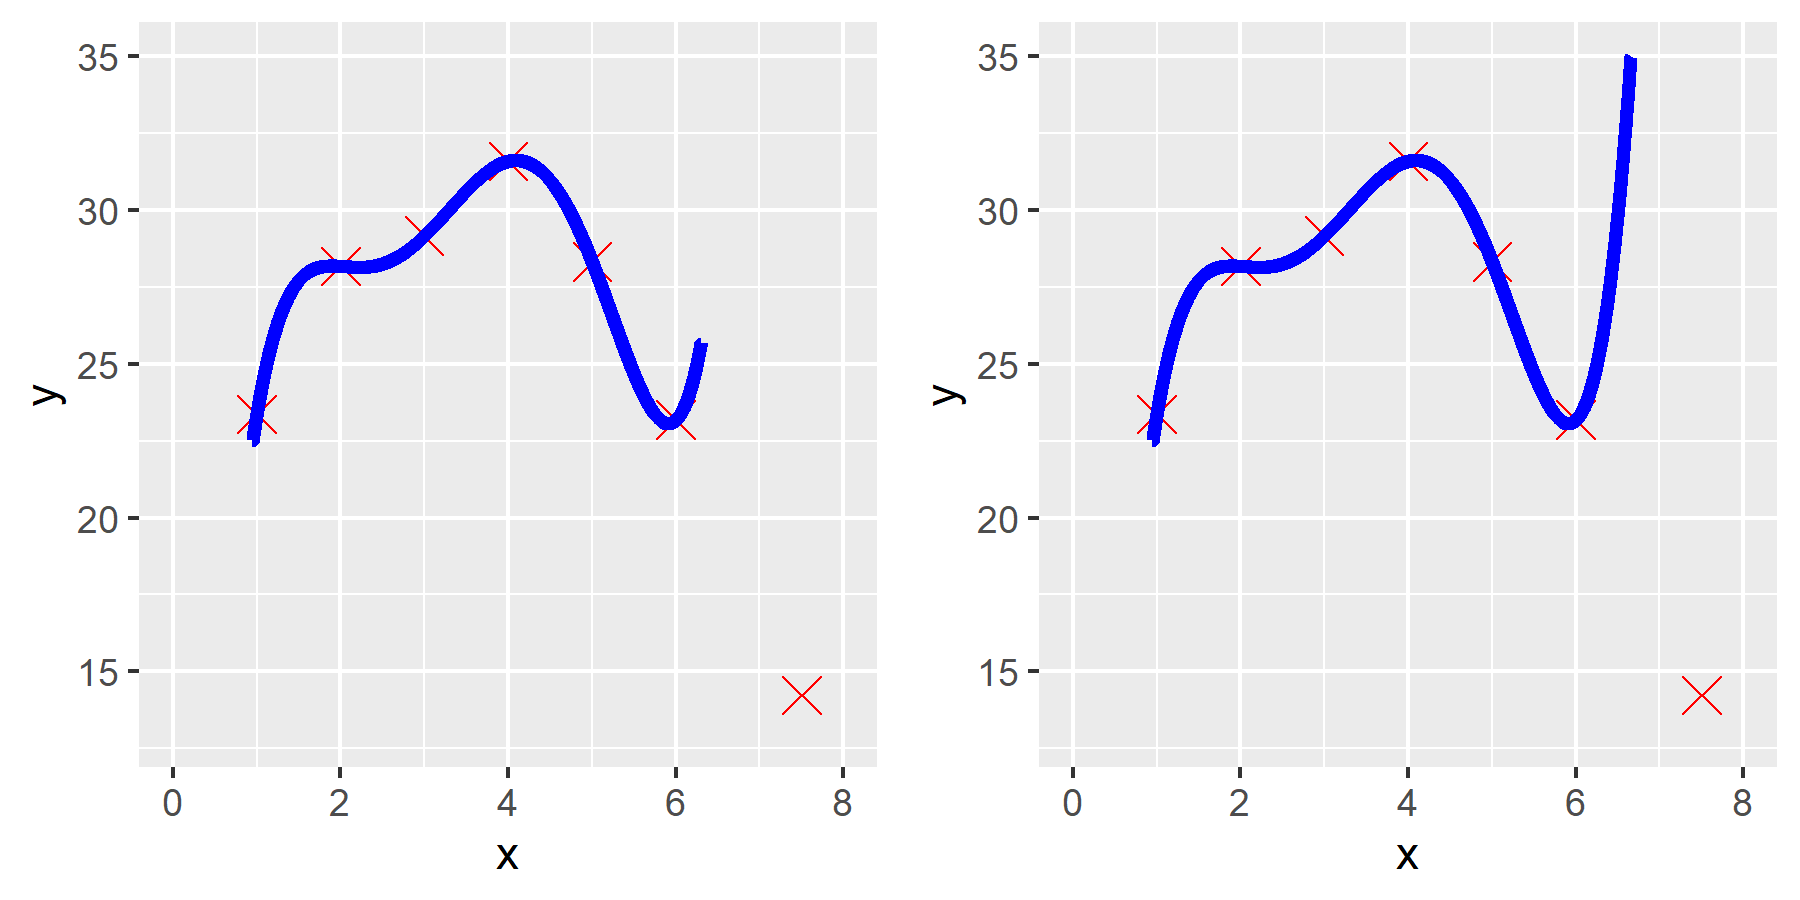

In [28]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/0bc2e28baa7540df9483cdf1e6ff73c5.png',
    width=800,
    height=400)

> Es el problema que se conoce como "overfitting" (sobre ajuste) en el que el modelo es demasiado complejo y consigue un ajuste bueno de manera artificial.

Para detectarlo, debemos evaluar el modelo sobre unos datos **diferentes**  de los que han servido para entrenarlo: separamos el conjunto entero en "training set" y en "test set".

- Entrenamos el modelo sobre el "training set".
- Evaluamos la bondad del modelo sobre el "test set"

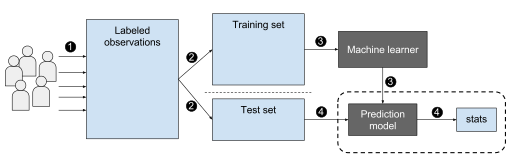

In [29]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/3f986657ed69444db2652b108e59c2f0.png',
    width=800,
    height=400
)

Attribution: EpochFail, CC BY-SA 4.0 via Wikimedia Commons https://commons.wikimedia.org/wiki/File:Supervised_machine_learning_in_a_nutshell.svg

`sckit-learn` nos proporciona funciones para realizar esta separacion de manera sencilla.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=314)

In [32]:
print(f'Tamaños: X: {X.shape}, X_train: {X_train.shape}, X_test: {X_test.shape}')
print(f'Tamaños: y: {y.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

Tamaños: X: (313, 1), X_train: (209, 1), X_test: (104, 1)
Tamaños: y: (313,), y_train: (209,), y_test: (104,)


> Podríamos incluso haber realizado esta partición de manera stratificada, respetando la proporción de los dos grados en el conjunto. Se hace con la función `StratifiedShuffleSplit` del mismo submódulo `model_selection`.

## Una mejor manera de evaluar la calidad del ajuste: validación cruzada (cross validation)

A la hora de evaluar la calidad del ajuste de nuestra hipótesis, se podría dar el caso de que la parte del conjunto que hemos escogido al azar y usado para ajustar es particularmente propicia, por casualidad, al modelo.

Para asegurarnos de que no se debe a la suerte, usamos el procedimiento de validación cruzada (aquí con 10 partes, fuente: http://karlrosaen.com/ml/learning-log/2016-06-20/):


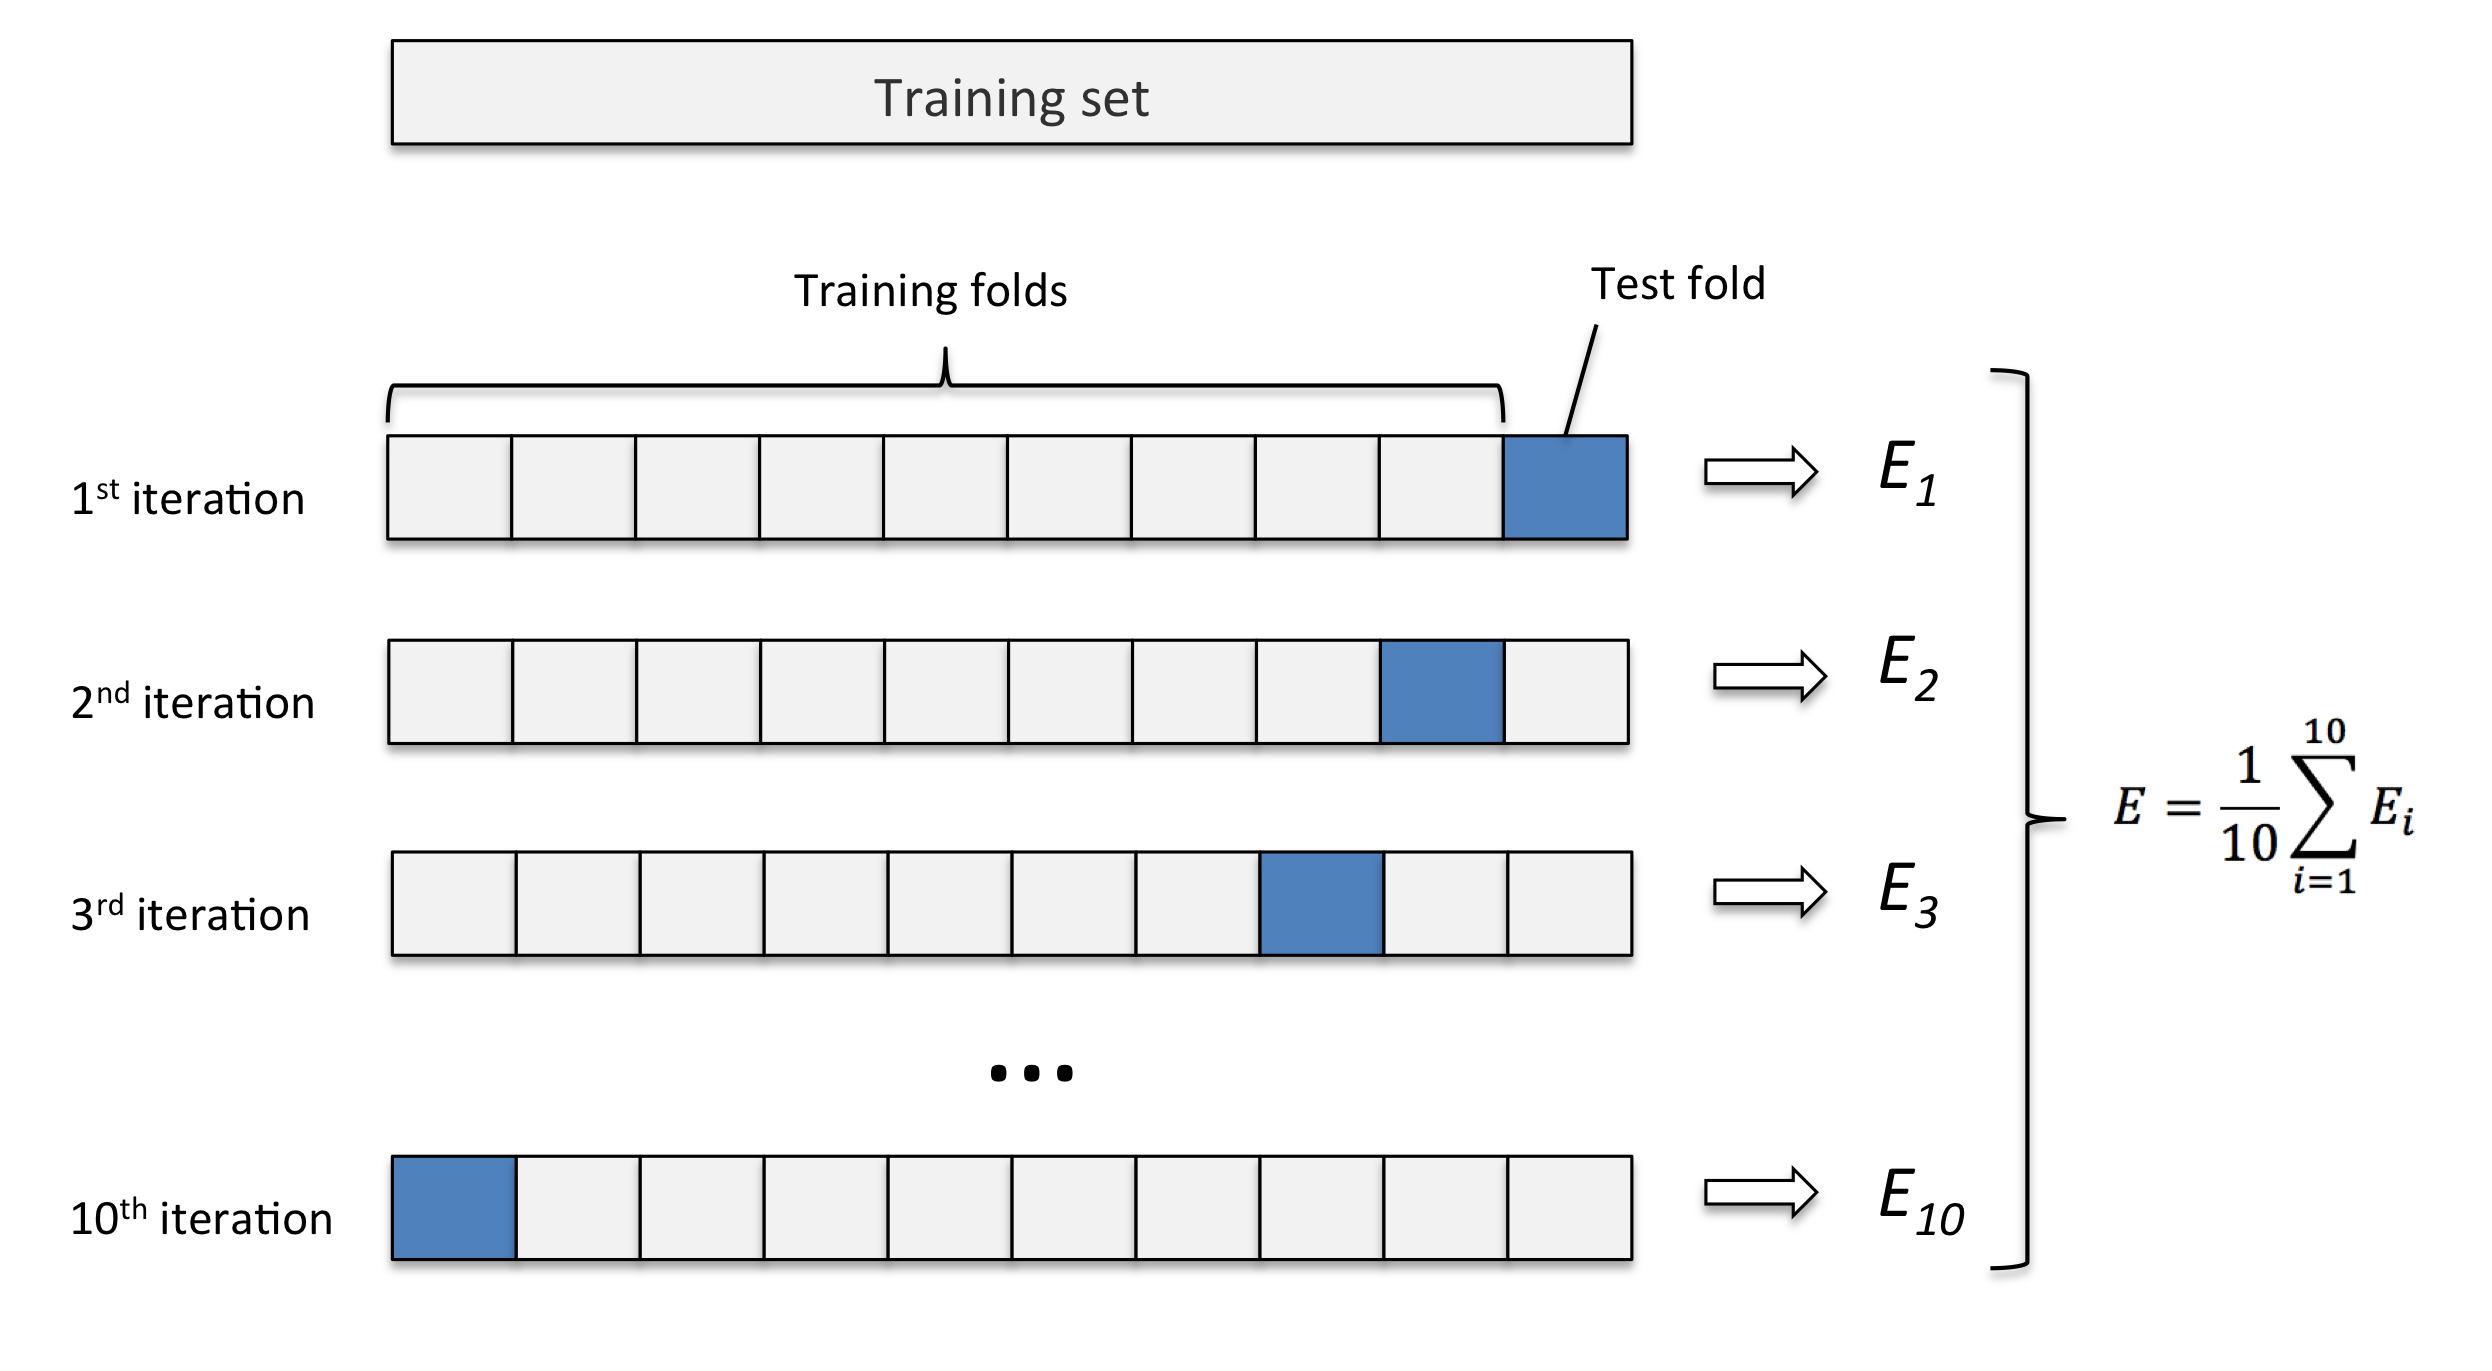

In [33]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/7654d4f2a9734f8b8bed21d97e07edef.png',
    width=600,
    height=500
)

En inglés, se llama k-fold cross validation, $k$ es el número de "pliegues", es decir partes que usamos.

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
            lin_reg,
            X_train,
            y_train,
            scoring='neg_mean_squared_error',
            cv=10
)
print(f'Media de las puntuaciones: {- np.mean(scores)}')
print(f'Desv. Típica de las puntuaciones: {np.std(-scores)}')

Media de las puntuaciones: 0.30167625217975447
Desv. Típica de las puntuaciones: 0.09854748002193774


> scikit-learn utiliza función de utilidad (número mayor es mejor) en lugar de función de coste. Especificamos el opuesto de MSE, con `scoring='neg_mean_squared_error'` y calculamos el opuesto de `scores`.

## Ajuste de hiperparámetros que intervengan en nuestro algoritmo

El funcionamiento de muchos de los algoritmos dependen de los valores de parámetros que hay que fijar.
En el caso del algoritmo del gradiente por ejemplo, está el número de iteraciones así como la taza de aprendizaje. No son parámetros del modelo, sino del algoritmo que busca encontrar el modelo, por lo que se llaman **hiperparámetros**. 

Para ilustrarlo, supongamos que queremos aplicar otro tipo de regresión: la regresión "Nearest Neighbors". Su principio es muy sencillo:
- decido de un número $K$ de puntos que se consideran vecinos de un individuo basándose en los valores de sus características (los $K$ puntos más próximos)
- Para un nuevo individuo, determino cuáles son sus $K$ vecinos en el conjunto de training, y le asigno como respuesta la respuesta promedio de sus vecinos.

Fuente: Scikit-learn User Guide: https://scikit-learn.org/stable/modules/neighbors.html#regression

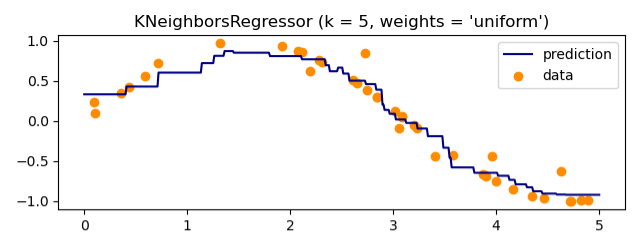

In [35]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/0fa3fd3fda244fa6bfe12dd8d32df664.png'
)

Está claro que el valor que escojamos de $K$ condiciona mucho el resultado del algoritmo:
- Si $K$ es pequeño (1 o 2 por ejemplo), la predicción presentará mucha variación
- Si $K$ es grande, la predicción presentará poca variación en intervalos más amplios.

En nuestro ejemplo de la predicción de la nota media:

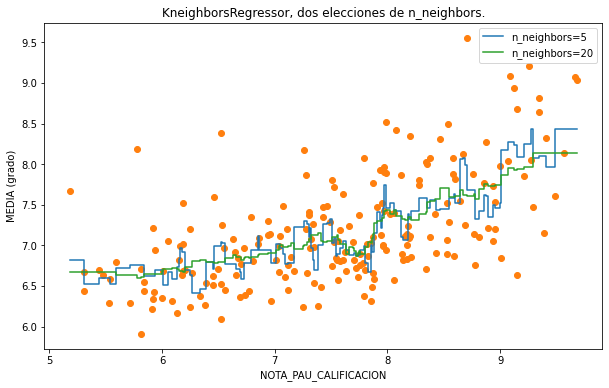

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_train_predict_5 = knr.predict(X_train)
knr = KNeighborsRegressor(n_neighbors=20)
knr.fit(X_train, y_train)
y_train_predict_20 = knr.predict(X_train)
i_sorted = np.argsort(X_train, axis=0).ravel()
fig, ax = plt.subplots(figsize=(10, 6))
ax.step(
    X_train[i_sorted,:],
    y_train_predict_5[i_sorted],
    label='n_neighbors=5')
ax.scatter(X_train, y_train, color='C1')
ax.step(
    X_train[i_sorted,:], 
    y_train_predict_20[i_sorted], 
    color='C2',
    label='n_neighbors=20'
)
ax.set_xlabel('NOTA_PAU_CALIFICACION')
ax.set_ylabel('MEDIA (grado)')
ax.set_title('KneighborsRegressor, dos elecciones de n_neighbors.')
ax.legend();

$K$ es un hiperparámetro que tendremos que fijar. Para ello, es buena práctica ir probando varios valores para ver cómo se comporta el algoritmo. Por ejemplo, para $K=5, 10, 20$

**Seguiremos el procedimiento**:
- Aplicaremos la validación cruzada sobre el training set,  para cada valor que contemplamos de $K$.
- Compararemos la puntuación (score) de los tres algoritmos correspondientes.
- Nos quedaremos con el que mejor puntuación tiene.
- Una vez seleccionado el valor de $K$ que presenta mejor rendimiento sobre el training set, aplicamos el algoritmo correspondiente sobre el test set, para ver su capacidad predictiva.

`scikit-learn` hace muy fácil este procedimiento con `GridSearchCV`

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [5, 10, 20]}
knr = KNeighborsRegressor()
grid_search = GridSearchCV(knr, param_grid, cv=5, scoring='neg_mean_squared_error')

Con esta última línea hemos instanciado el estimador, ahora toca los pasos de ajuste y predicción

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 20]},
             scoring='neg_mean_squared_error')

El resultado de grid_search es el mejor estimador, puedo usarlo directamente para la predicción sobre el conjunto test:

In [39]:
y_test_pred = grid_search.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred, squared=True)

0.23117975275895564

Podríamos especificar más de un parámetro en `param_grid`, anadiendo entradas al diccionario.

In [40]:
param_grid = {'n_neighbors': [5, 10, 20], 'weights': 'distance'} # sólo un valor para weights
param_grid = {'n_neighbors': [5, 10, 20], 'weights': ['uniform', 'distance']} # probará todas las combinaciones

Puedo comprobar qué valor o combinación de los hiperparámetros ha dado el mejor resultado

In [41]:
grid_search.best_params_

{'n_neighbors': 20}

O directamente el mejor estimador

In [42]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=20)

y puedo recorrer todos los algoritmos que se probaron, imprimiendo su puntuación:

In [43]:
resultados = grid_search.cv_results_
for mean_score, params in zip(resultados['mean_test_score'], resultados['params']):
    print(np.sqrt(-mean_score), params)

0.5831455566214823 {'n_neighbors': 5}
0.553052409413684 {'n_neighbors': 10}
0.5489286376843788 {'n_neighbors': 20}


Finalmente, en el caso en que hayamos construido un flujo de transformador(es) y estimador(es), hay que tener en cuenta que debemos, para especificar la lista de valores del hiperparámetro que queremos usar,  añadir de prefijo el nombre que le hemos dado al paso asociado, con dos guiones bajos. 

In [44]:
scaler = StandardScaler()
knr = KNeighborsRegressor()
regresor =  Pipeline([('estanderizacion', scaler), ('knregression', knr)])
param_grid = {'knregression__n_neighbors': [5, 10, 20]}
grid_search = GridSearchCV(regresor, param_grid, cv=5, scoring='neg_mean_squared_error')

## En resumen:

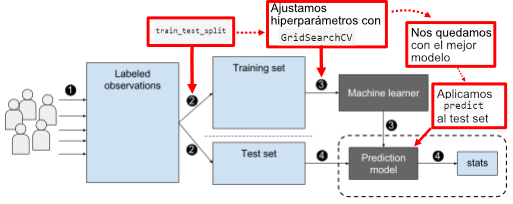

In [45]:
display.Image(
    'https://multimediarepository.blob.core.windows.net/imagecontainer/fbaadbeaacaa450dbeafd7c6aee456c9.png',
    width=800,
    height=400
)

Imagen original: EpochFail, CC BY-SA 4.0 via Wikimedia Commons https://commons.wikimedia.org/wiki/File:Supervised_machine_learning_in_a_nutshell.svg